# Kaggle TGS Salt Identification Challenge EDA

This notebook provides a simple exploration of the dataset for the Kaggle TGS Salt Identification Challenge

## Setup

In [1]:
# Standard python packages
import os
import sys

# Other package imports
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')

train_path = os.path.join(data_folder_raw, 'train')
train_images_path = os.path.join(train_path, 'images')
train_masks_path = os.path.join(train_path, 'masks')
train_file = os.path.join(data_folder_raw, 'train.csv')

test_path = os.path.join(data_folder_raw, 'test')
test_images_path = os.path.join(test_path, 'images')

This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, src_folder)

from examplepackage import examplemodule

## Train file
Look at the train file that contains image id's along with a mask of salt regions

In [4]:
print(train_file)
train_df = pd.read_csv(train_file)

D:\Development\DataScience\Learning\Kaggle TGS Salt Identification Challenge\data\raw\train.csv


In [5]:
train_df.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


## Visualisation

In [6]:
def read_image(data_id):    
    filename = os.path.join(train_images_path, "{}.png".format(data_id))
    image = cv2.imread(filename)   
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image
    
def read_mask(data_id, is_train=True):
    filename = os.path.join(train_masks_path, "{}.png".format(data_id))
    image = cv2.imread(filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image
    
def plot_image_mask(data_id):
    image = read_image(data_id)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    mask = read_mask(data_id)
    
    green_image = np.zeros(image.shape, image.dtype)
    green_image[:,:] = (0, 255, 0)
    green_mask = cv2.bitwise_and(green_image, green_image, mask=mask)
    
    combined_image = np.zeros(image.shape, image.dtype)
    cv2.addWeighted(green_mask, 0.2, image, 1, 0, combined_image)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(image, cmap="gray")
    axarr[1].imshow(mask, cmap="gray")
    axarr[2].imshow(combined_image, cmap="gray")
    axarr[0].grid()
    axarr[1].grid()
    axarr[2].grid()
    axarr[0].set_title('Image')
    axarr[1].set_title('Mask') 
    axarr[2].set_title('Combined')
    plt.show()

Information about a single image

(101, 101)


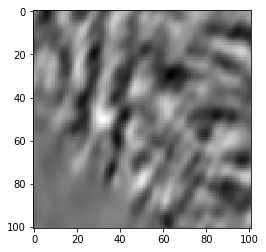

In [7]:
image = read_image("34e51dba6a")
print(image.shape)
plt.imshow(image, cmap="gray")

Information about a mask

(101, 101)


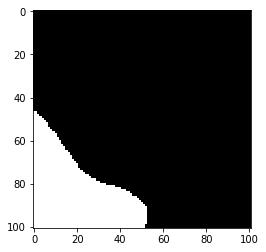

In [8]:
mask = read_mask("34e51dba6a")
print(mask.shape)
plt.imshow(mask, cmap="gray")

Combined plot showing the image with the mask overlayed. Here we can see that there are examples without salt, as you can see by the masks that are entirely dark.

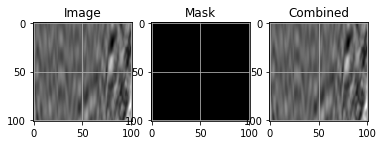

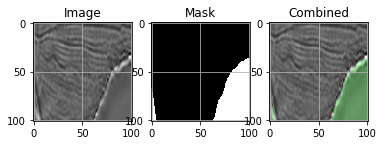

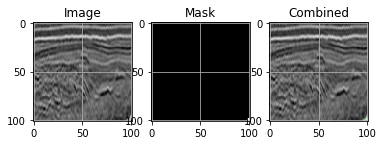

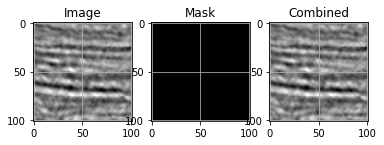

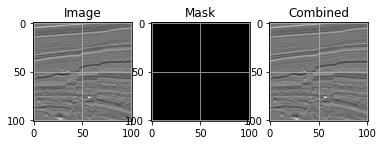

In [9]:
ids= ['1f1cc6b3a4','5b7c160d0d','6c40978ddf','7dfdf6eeb8','7e5a6e5013']
for j, img_name in enumerate(ids):
    img = plot_image_mask(img_name)

## Appendix 1 - Environment Configuration

In [10]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

D:\Development\DataScience\Learning\Kaggle TGS Salt Identification Challenge\notebooks\eda
3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
c:\applications\miniconda3\envs\tensorflow-gpu\python.exe
['D:\\Development\\DataScience\\Learning\\Kaggle TGS Salt Identification Challenge\\src', '', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\python36.zip', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\DLLs', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\lib', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\lib\\site-packages', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\object_detection-0.1-py3.6.egg', 'c:\\applications\\miniconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\mark_\\.ipython']


## Appendix 2 - Automated Tests

In [11]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts =============================
platform win32 -- Python 3.6.2, pytest-3.2.1, py-1.4.34, pluggy-0.4.0
rootdir: D:\Development\DataScience\Learning\Kaggle TGS Salt Identification Challenge, inifile:
collected 0 items / 3 errors

=================================== ERRORS ====================================
___________________ ERROR collecting tests/test_notebook.py ___________________
ImportError while importing test module 'D:\Development\DataScience\Learning\Kaggle TGS Salt Identification Challenge\tests\test_notebook.py'.
Hint: make sure your test modules/packages have valid Python names.
Traceback:
tests\test_notebook.py:6: in <module>
    import numpy as np
E   ModuleNotFoundError: No module named 'numpy'
 ERROR collecting tests/examplepackage/examplemodule/test_add_value_to_numpy.py 
ImportError while importing test module 'D:\Development\DataScience\Learning\Kaggle TGS Salt Identification Challenge\tests\examplepackage\examplemodul